# Iniciando analise de dados da tabela insurance

objetivo de criar um modelo que encontre o motivo do plano de saúde ser mais caro com base nesses dados.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("insurance.csv")

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Verificando dados do dataset

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analisando as descrições estatiticas do dataset, para encontrar alguma tendência

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Para melhor analise dos dados vamos transformar os tipos de categoria de texto para numérico

In [6]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

dataset['smoker'] =  label_encoder.fit_transform(dataset['smoker'])
dataset['sex'] =  label_encoder.fit_transform(dataset['sex'])

region_encoded = one_hot_encoder.fit_transform(dataset[['region']]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=one_hot_encoder.get_feature_names_out(['region']))

dataset = pd.concat([dataset, region_encoded_df], axis=1)
dataset.drop('region', axis=1, inplace=True)


## Novo dataset agora com os dados transformados

In [7]:
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


## Como está a distribuição de idade do dataset?

<Axes: >

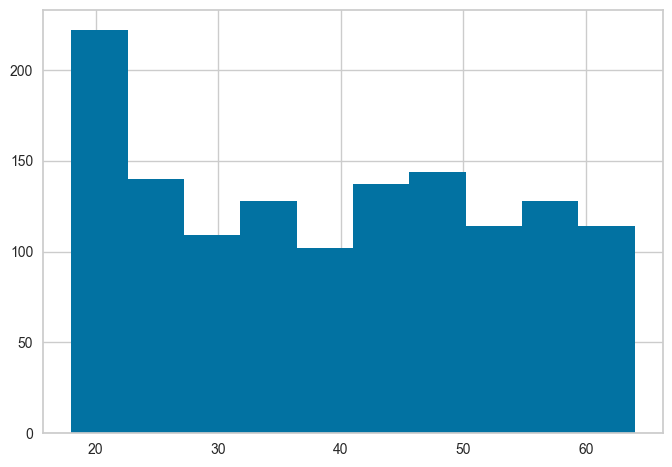

In [8]:
dataset['age'].hist()

## Como está a distribuição de Charges do dataset?

<Axes: >

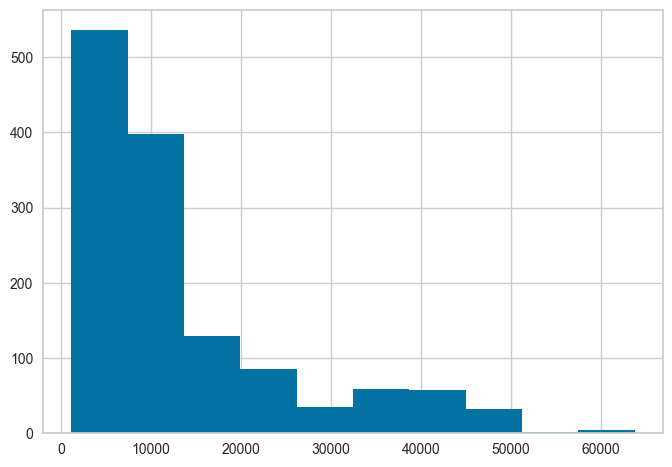

In [9]:
dataset['charges'].hist()

## Como está a distribuição de BMI do dataset?

<Axes: >

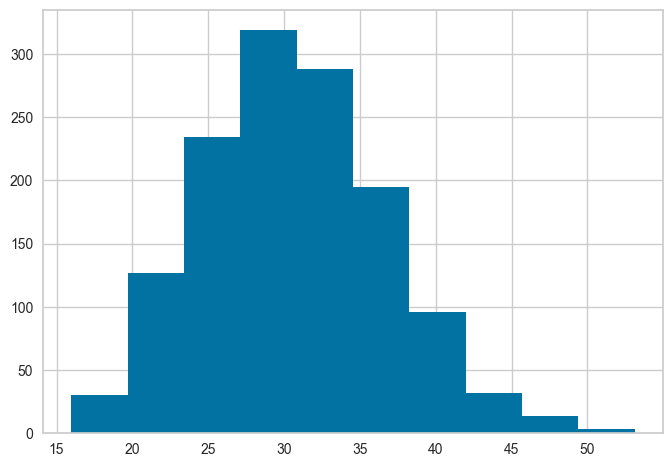

In [10]:
dataset['bmi'].hist()

## Analisando a relação de BMI entre pessoas fumantes e não fumantes

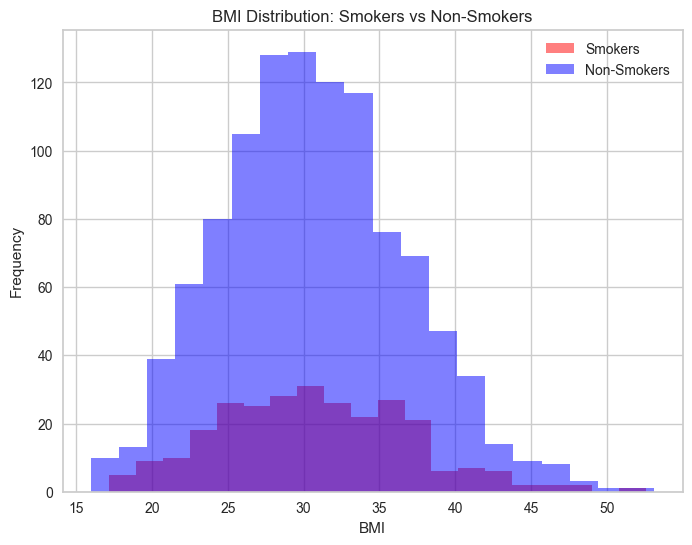

In [11]:
smokers = dataset[dataset['smoker'] == 1]
no_smokers = dataset[dataset['smoker'] == 0]

# Plotar os histogramas de BMI para fumantes e não-fumantes juntos
plt.figure(figsize=(8,6))

# Histograma para fumantes
smokers['bmi'].hist(alpha=0.5, color='red', bins=20, label='Smokers')

# Histograma para não-fumantes
no_smokers['bmi'].hist(alpha=0.5, color='blue', bins=20, label='Non-Smokers')

# Títulos e rótulos
plt.title('BMI Distribution: Smokers vs Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Mostrar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

## Analisando o Charges em relação a pessoas fumantes e não fumantes

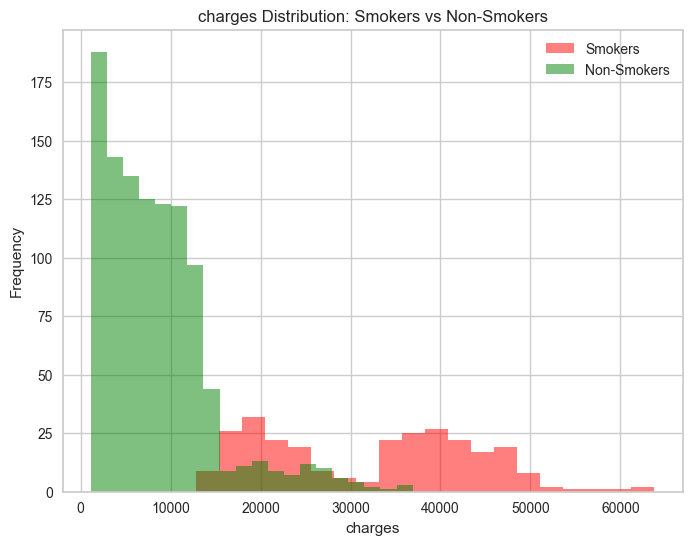

In [12]:
smokers = dataset[dataset['smoker'] == 1]
no_smokers = dataset[dataset['smoker'] == 0]

# Plotar os histogramas de BMI para fumantes e não-fumantes juntos
plt.figure(figsize=(8,6))

# Histograma para fumantes
smokers['charges'].hist(alpha=0.5, color='red', bins=20, label='Smokers')

# Histograma para não-fumantes
no_smokers['charges'].hist(alpha=0.5, color='green', bins=20, label='Non-Smokers')

# Títulos e rótulos
plt.title('charges Distribution: Smokers vs Non-Smokers')
plt.xlabel('charges')
plt.ylabel('Frequency')

# Mostrar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Aplicando a mesma visão em um grafico de dispersão

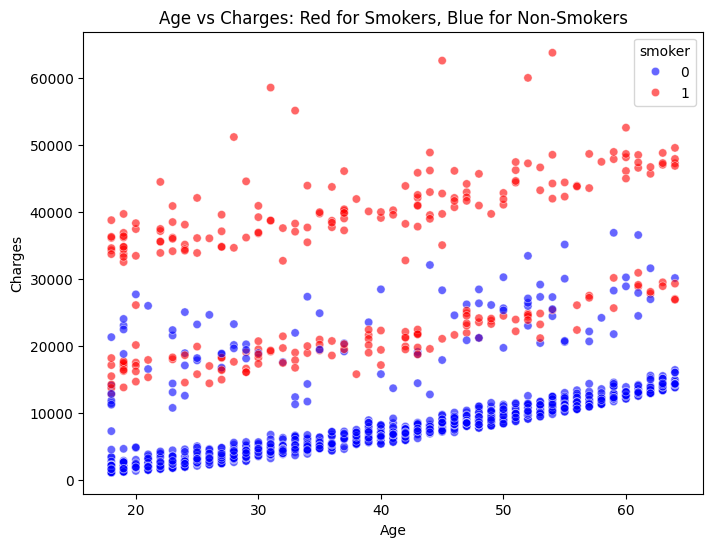

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma paleta de cores: vermelho para fumantes e azul para não-fumantes
palette = {1: 'red', 0: 'blue'}  # Assumindo que 'smoker' tem valores 'yes' e 'no'

# Gráfico de dispersão com fumantes em vermelho e não-fumantes em azul
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6)

# Títulos e rótulos
plt.title('Age vs Charges: Red for Smokers, Blue for Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')

# Mostrar o gráfico
plt.show()


## Analisando o BMI vs Charges para fumantes e não fumantes

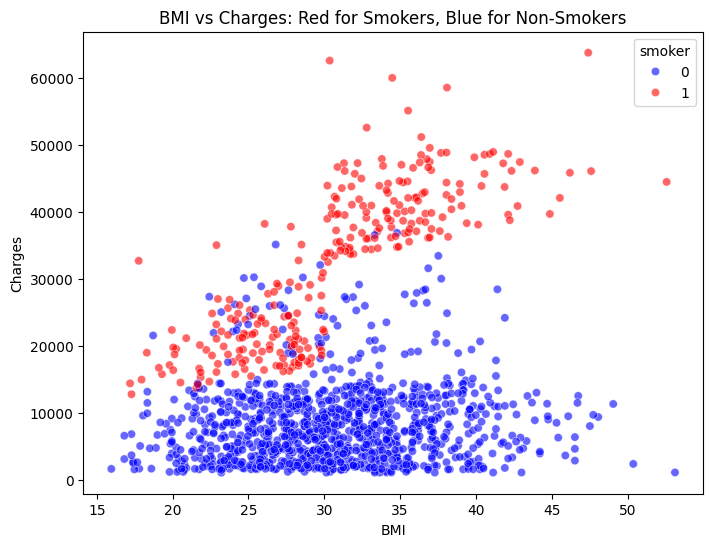

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma paleta de cores: vermelho para fumantes e azul para não-fumantes
palette = {1: 'red', 0: 'blue'}  # Assumindo que 'smoker' tem valores 'yes' e 'no'

# Gráfico de dispersão com fumantes em vermelho e não-fumantes em azul
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6)

# Títulos e rótulos
plt.title('BMI vs Charges: Red for Smokers, Blue for Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Mostrar o gráfico
plt.show()


## Verificando o balanceamento entre as colunas do dataset

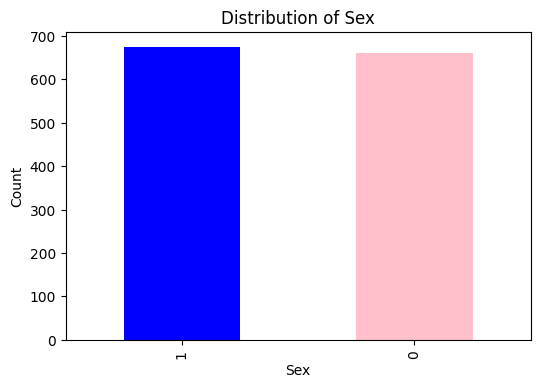

In [30]:
sex_counts = dataset['sex'].value_counts()

plt.figure(figsize=(6,4))
sex_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

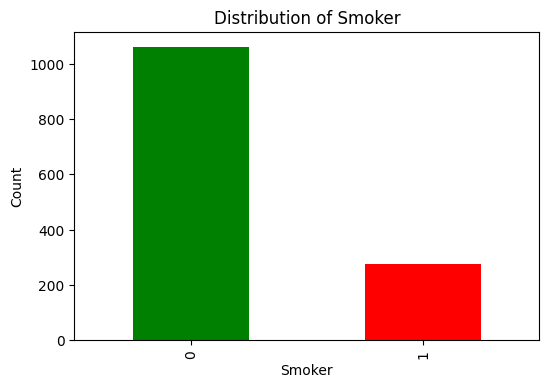

In [31]:
smoker_counts = dataset['smoker'].value_counts()

plt.figure(figsize=(6,4))
smoker_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

## Analisando a correlação dos dados do dataset

In [32]:
dataset.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


## Verificando a médias de Charges por região

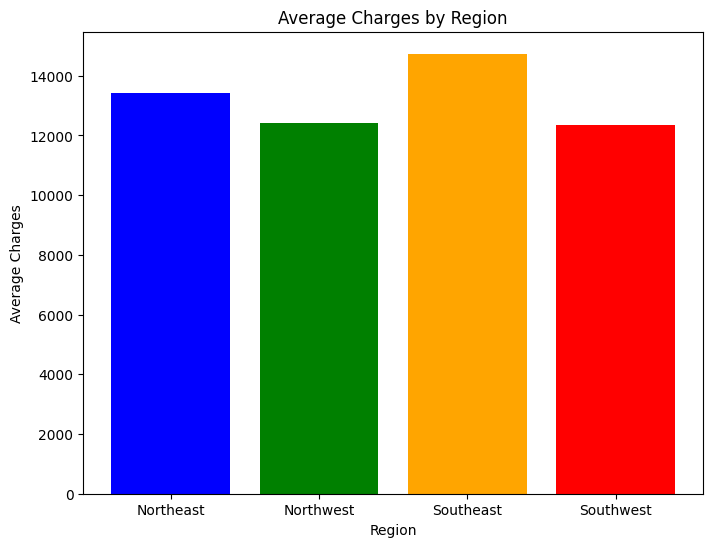

In [33]:
mean_northeast = dataset[dataset['region_northeast'] == 1]['charges'].mean()
mean_northwest = dataset[dataset['region_northwest'] == 1]['charges'].mean()
mean_southeast = dataset[dataset['region_southeast'] == 1]['charges'].mean()
mean_southwest = dataset[dataset['region_southwest'] == 1]['charges'].mean()

import matplotlib.pyplot as plt

# Médias calculadas
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
mean_charges = [mean_northeast, mean_northwest, mean_southeast, mean_southwest]

# Plotar gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(regions, mean_charges, color=['blue', 'green', 'orange', 'red'])

# Títulos e rótulos
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


/var/folders/qt/bs7l39091qq7369vc_rd8ypm0000gn/T/ipykernel_4077/2473499357.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=dataset, palette='Set3')


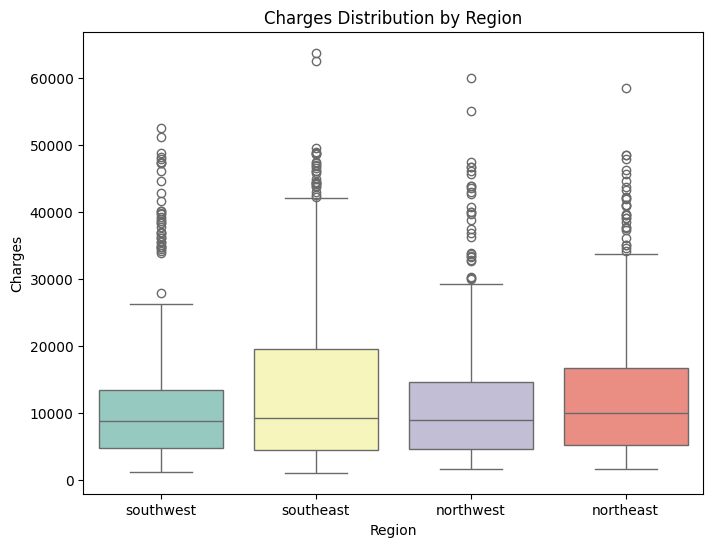

In [34]:
import seaborn as sns

# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
dataset['region'] = dataset[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
dataset['region'] = dataset['region'].str.replace('region_', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=dataset, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


/var/folders/qt/bs7l39091qq7369vc_rd8ypm0000gn/T/ipykernel_4077/2107045669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_smokers['region'] = no_smokers[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
/var/folders/qt/bs7l39091qq7369vc_rd8ypm0000gn/T/ipykernel_4077/2107045669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_smokers['region'] = no_smokers['region'].str.replace('region_', '')
/var/folders/qt/bs7l39091qq7369vc_rd8ypm0000gn/T/ipykern

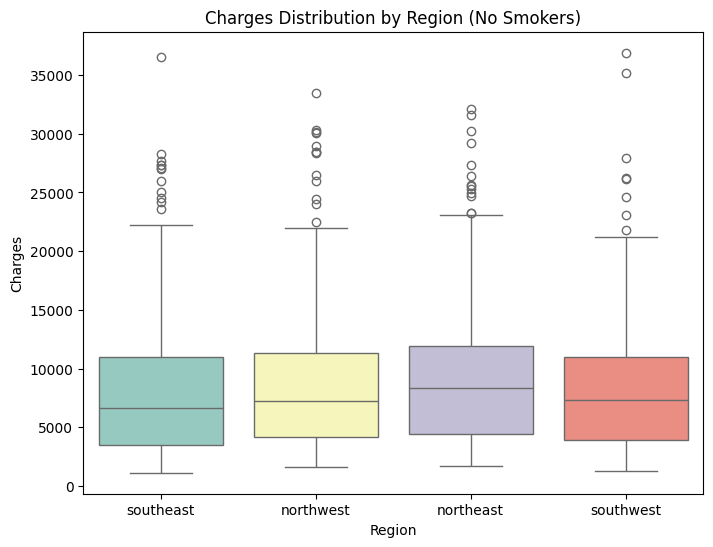

In [35]:
# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
no_smokers['region'] = no_smokers[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
no_smokers['region'] = no_smokers['region'].str.replace('region_', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=no_smokers, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region (No Smokers)')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


## Analisando a proporção de fumantes por região

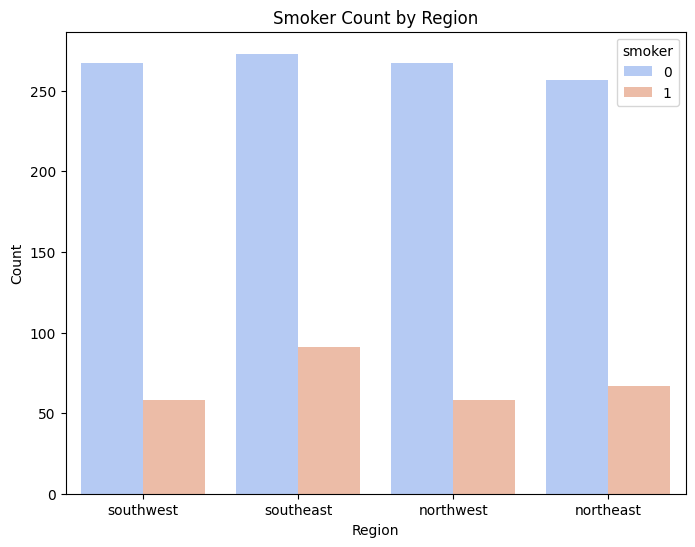

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='region', hue='smoker', data=dataset, palette='coolwarm')

# Títulos e rótulos
plt.title('Smoker Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


# Analisando relação de fumantes por região em relação ao charges

# Criando modelo de analise de regressão para analisar charges vs smokers

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
dataset.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [39]:
# Dividindo os dados em conjuntos de treinamento e teste
dataset_chages = dataset[['charges']]  # Recurso (variável independente)
dataset_smokers = dataset[['age', 'sex', 'bmi', 'children', 'smoker']]  # Rótulo (variável dependente)

x_train, x_test, y_train, y_test = train_test_split(dataset_smokers, dataset_chages, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = lr.predict(x_test)


Erro Médio Quadrático: 33979257.0508082
Erro Absoluto Médio: 4213.484797807135
R² (coeficiente de determinação): 0.7811302113434097


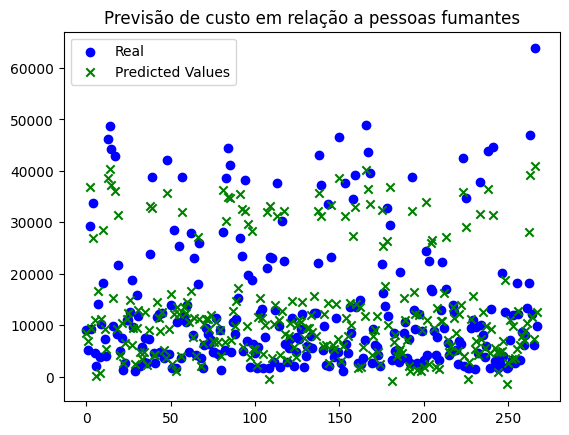

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(np.arange(len(y_test)), y_test, label='Real', color='blue', marker='o')
plt.scatter(np.arange(len(previsoes)), previsoes, label='Predicted Values', color='green', marker='x')

plt.title('Previsão de custo em relação a pessoas fumantes')
plt.legend()
plt.show()

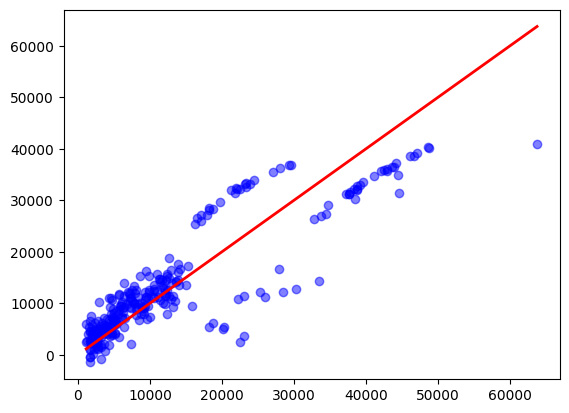

In [41]:
plt.scatter(y_test, previsoes, color='blue', alpha=0.5)

# Plotting the perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6, n_jobs=2)

rf_model.fit(x_train, y_train.values.ravel())

rf_predictions = rf_model.predict(x_test)



In [43]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Erro Absoluto Medio: {rf_mae}')
print(f'Erro Quadratico Medio: {rf_rmse}')
print(f'R² (coeficiente de determinação): {rf_r2}')

Erro Absoluto Medio: 2523.2484279502596
Erro Quadratico Medio: 20237960.55169339
R² (coeficiente de determinação): 0.8696417010481932


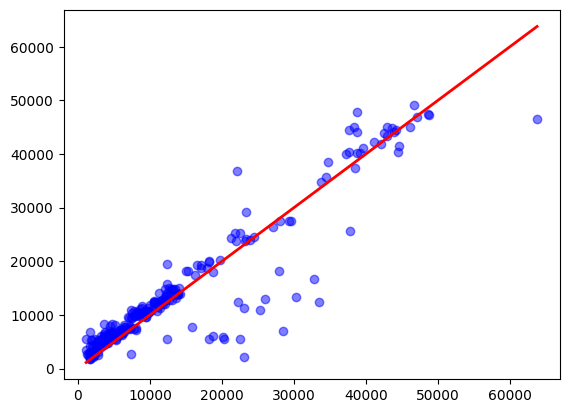

In [44]:
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)



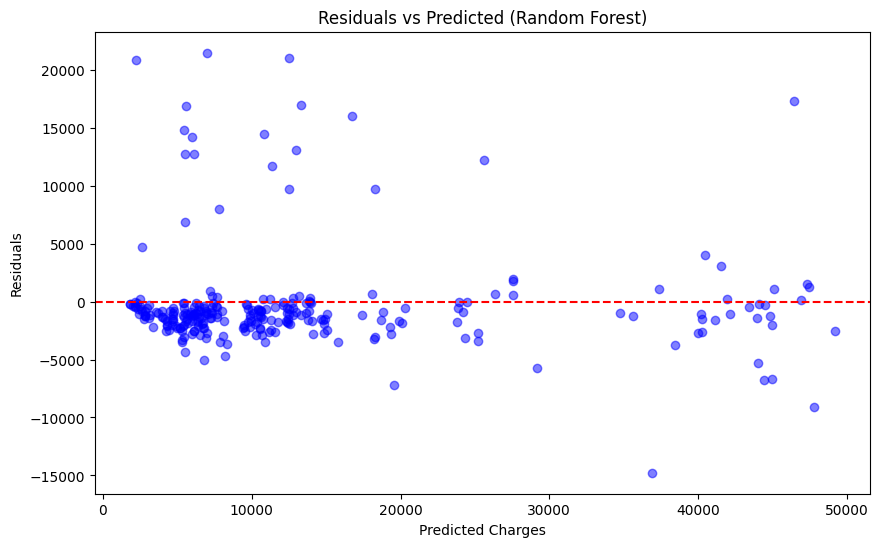

In [45]:
y_test_array = y_test.values.ravel() 

residuals_rf = y_test_array - rf_predictions


# Plot residuals for Random Forest
plt.figure(figsize=(10,6))
plt.scatter(rf_predictions, residuals_rf, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Random Forest)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

In [46]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [47]:
dt_predictions = dt_model.predict(x_test)

In [48]:
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Erro Absoluto Medio: {dt_mae}')
print(f'Erro Quadratico Medio: {dt_rmse}')
print(f'R² (coeficiente de determinação): {dt_r2}')

Erro Absoluto Medio: 2865.6378101751257
Erro Quadratico Medio: 22812669.852340844
R² (coeficiente de determinação): 0.8530572866320028


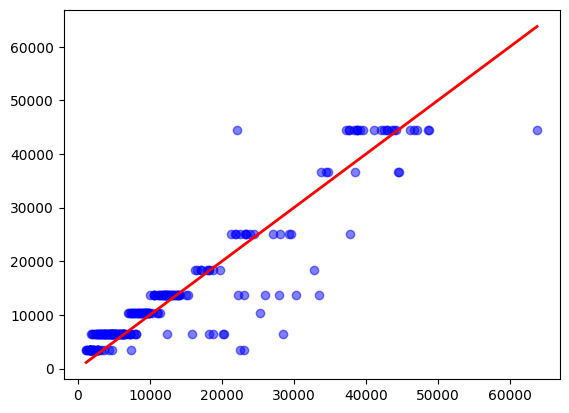

In [49]:
plt.scatter(y_test, dt_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [30]:
df = dataset.copy()

df = df[['age', 'bmi', 'smoker', 'charges']]

from pycaret.regression import *
s = setup(df, target = 'charges', session_id = 123, n_jobs=2, train_size=0.8, fold=30)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 6)"
4,Transformed data shape,"(1338, 6)"
5,Transformed train set shape,"(1070, 6)"
6,Transformed test set shape,"(268, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [31]:
comparation = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2668.5734,23179243.7952,4640.6070,0.8269,0.4438,0.3175,0.0437
lightgbm,Light Gradient Boosting Machine,3014.1944,26584477.8213,4995.1904,0.7964,0.5331,0.3750,0.0690
rf,Random Forest Regressor,2907.4841,27455910.4072,5103.1204,0.7891,0.5026,0.3668,0.0683
ada,AdaBoost Regressor,4537.0050,30466215.4713,5447.7796,0.7672,0.6538,0.7873,0.0103
et,Extra Trees Regressor,3044.9395,33045614.0579,5596.4333,0.7510,0.5353,0.3904,0.0537
ridge,Ridge Regression,4310.6996,38761429.6333,6130.3918,0.7134,0.5783,0.4441,0.0050
lasso,Lasso Regression,4300.5659,38756760.2000,6129.7013,0.7132,0.5951,0.4423,0.0040
llar,Lasso Least Angle Regression,4300.5674,38756755.2000,6129.7011,0.7132,0.5951,0.4423,0.0040
br,Bayesian Ridge,4303.9761,38760505.2000,6130.1117,0.7132,0.5876,0.4429,0.0047
lr,Linear Regression,4300.3765,38760074.4333,6129.9599,0.7131,0.5970,0.4422,0.0047


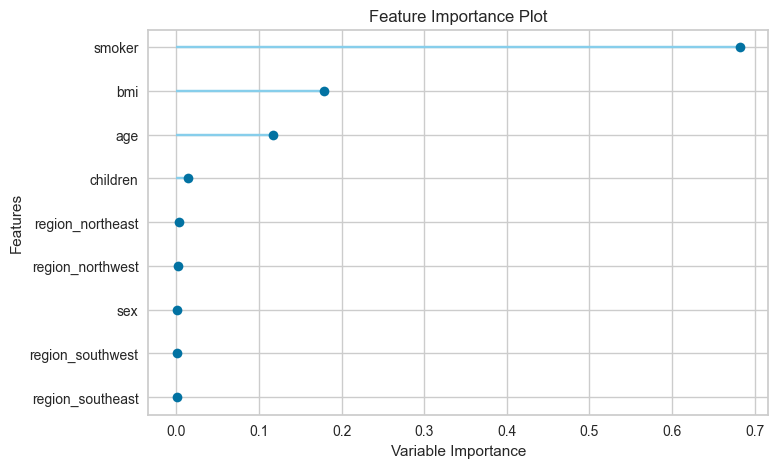

In [18]:
s.plot_model(comparation, plot = 'feature')

In [20]:
evaluate_model(comparation)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

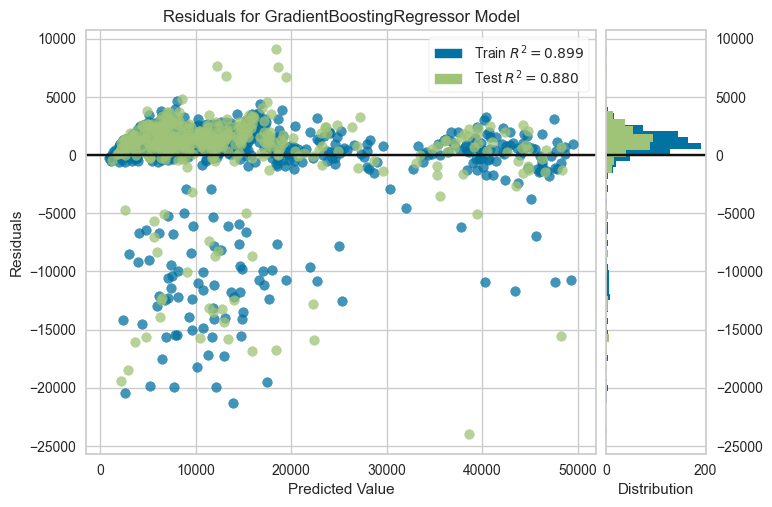

In [21]:
s.plot_model(comparation, plot = 'residuals')

In [22]:
print(comparation)

GradientBoostingRegressor(random_state=123)
